# LEGO EDA

GitHub Repository: https://github.com/skhiearth/LEGO-EDA

Exploring the Rebrickable database, including data on every LEGO set that ever been sold; the names of the sets, what bricks they contain, what color the bricks are, etc. Inspired by the 'Exploring 67 years of LEGO' project on DataCamp by Ramnath Vaidyanathan.

A comprehensive database of lego blocks is provided by [Rebrickable](https://rebrickable.com/downloads/). The data is available as csv files and the schema is shown below:
![Schema](assets/schema.png)

### Exploring Colors

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Reading colors data
colors = pd.read_csv('datasets/colors.csv')
colors.head()

,id,name,rgb,is_trans
0,-1,[Unknown],0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [2]:
# How many distinct colors are available?
num_colors = colors.shape[0]
num_colors

179

In [3]:
# colors_summary: Distribution of colors based on transparency
colors_summary = colors.groupby('is_trans').count()
colors_summary

,id,name,rgb
is_trans,,,
f,151,151,151
t,28,28,28


### Exploring Sets

In [4]:
# Reading sets data
sets = pd.read_csv('datasets/sets.csv')
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [5]:
# Creating a summary of average number of parts by year: `parts_by_year`
parts_by_year = sets[['year', 'num_parts']].groupby('year', as_index = False).mean()
parts_by_year.head()

,year,num_parts
0,1949,99.600000
1,1950,1.000000
2,1953,13.500000
3,1954,12.357143
4,1955,36.607143


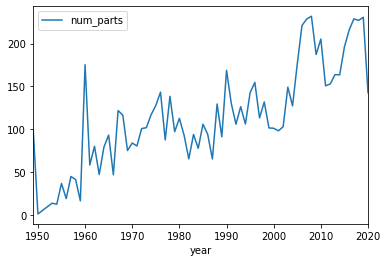

In [6]:
# Plotting trends in average number of parts by year
parts_by_year.plot(x = 'year', y = 'num_parts')

### Exploring Themes over the years

In [7]:
# themes_by_year: Number of themes shipped by year
themes_by_year = sets[['year', 'theme_id']].groupby('year', as_index = False).agg({"theme_id": pd.Series.nunique})
themes_by_year.head()

,year,theme_id
0,1949,2
1,1950,1
2,1953,2
3,1954,2
4,1955,4


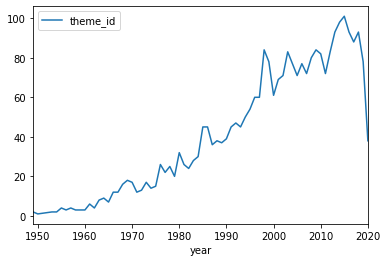

In [8]:
# Plotting trends in average number of parts by year
themes_by_year.plot(x = 'year', y = 'theme_id')